In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

In [42]:
#reading in the data
df = pd.read_excel("processed_data.xlsx")
df.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE,REGISTRATION_YEARS,ID_PUBLISH_YEARS
0,0,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.668497,38,1,13
1,1,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.512601,23,9,3
2,2,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.149240,35,17,10
3,3,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.556444,52,6,7
4,4,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,...,0.0,0.0,0.0,0.0,2.0,5.0,0.581288,30,21,7


In [43]:
#datatypes of the columns within the df
df.dtypes

Unnamed: 0                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_EMPLOYED                    int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
CNT_FAM_MEMBERS                  int64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CI

In [45]:
#summary of the missing values
missing_summary = df.isnull().sum()
print("Missing values after converting placeholders:")
print(missing_summary[missing_summary > 0])

Missing values after converting placeholders:
NAME_TYPE_SUITE                 81
OBS_30_CNT_SOCIAL_CIRCLE        54
DEF_30_CNT_SOCIAL_CIRCLE        54
OBS_60_CNT_SOCIAL_CIRCLE        54
DEF_60_CNT_SOCIAL_CIRCLE        54
AMT_REQ_CREDIT_BUREAU_HOUR    2701
AMT_REQ_CREDIT_BUREAU_DAY     2701
AMT_REQ_CREDIT_BUREAU_WEEK    2701
AMT_REQ_CREDIT_BUREAU_MON     2701
AMT_REQ_CREDIT_BUREAU_QRT     2701
AMT_REQ_CREDIT_BUREAU_YEAR    2701
dtype: int64


In [46]:
#replacing missing values in the amt_req_credit columns
amt_req_cols = [col for col in df.columns if 'AMT_REQ_CREDIT_BUREAU' in col]
# Replacing missing values with 0
for col in amt_req_cols:
    df[col].fillna(0, inplace=True)

print(df[amt_req_cols].isnull().sum())

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64


C:\Users\miyee\AppData\Local\Temp\ipykernel_42500\1267886547.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


In [47]:
#outliers within the days employed
outlier_count = (df['DAYS_EMPLOYED'] == 365243).sum()
print(f"Count of the DAYS_EMPLOYED outlier value (365243): {outlier_count}")

Count of the DAYS_EMPLOYED outlier value (365243): 3599


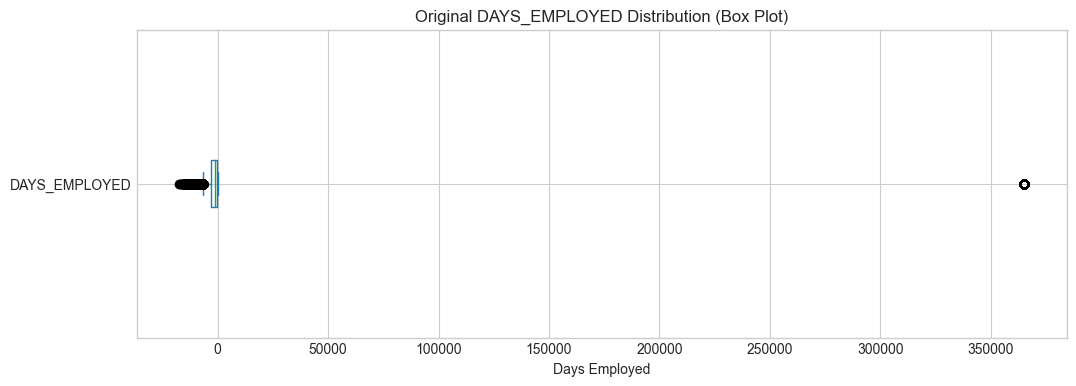

In [48]:
#visualizing the outlier
df['DAYS_EMPLOYED'].plot.box(vert=False, figsize=(12, 4))
plt.title('Original DAYS_EMPLOYED Distribution (Box Plot)')
plt.xlabel('Days Employed')
plt.show()

In [49]:
# --- 2. Identify and Handle the Anomaly ---

# Find the anomalous value (it's 365243 in this dataset)
anomaly_value = df['DAYS_EMPLOYED'].max()
print(f"\nIdentified anomalous value: {anomaly_value}")

# Create a new binary flag column for the anomaly.
# This captures the important information that these applicants are in a special category (e.g., pensioners).
df['DAYS_EMPLOYED_ANOMALY'] = df['DAYS_EMPLOYED'] == anomaly_value
print("\nValue counts for the new 'DAYS_EMPLOYED_ANOMALY' flag:")
print(df['DAYS_EMPLOYED_ANOMALY'].value_counts())

# Replace the anomalous values in the original column with NaN (Not a Number)
# This allows us to work with the distribution of the legitimate values.
df['DAYS_EMPLOYED'].replace({anomaly_value: np.nan}, inplace=True)
print("\nReplaced anomalous values with NaN.")


# --- 3. Impute Missing Values ---
# Most ML models can't handle NaNs, so we need to fill them.
# Using the median is a robust way to fill, as it's not affected by outliers.
median_days_employed = df['DAYS_EMPLOYED'].median()
print(f"\nMedian of non-anomalous 'DAYS_EMPLOYED': {median_days_employed}")

df['DAYS_EMPLOYED'].fillna(median_days_employed, inplace=True)
print("Filled NaN values with the median.")
print("\nChecking for remaining NaN values:")
print(f"NaN count: {df['DAYS_EMPLOYED'].isnull().sum()}") # Should be 0


Identified anomalous value: 365243

Value counts for the new 'DAYS_EMPLOYED_ANOMALY' flag:
DAYS_EMPLOYED_ANOMALY
False    16401
True      3599
Name: count, dtype: int64

Replaced anomalous values with NaN.

Median of non-anomalous 'DAYS_EMPLOYED': -1660.0
Filled NaN values with the median.

Checking for remaining NaN values:
NaN count: 0


--- Analyzing Column Distributions ---

--- FLAG_EMAIL ---
FLAG_EMAIL
0    94.26
1     5.74
Name: proportion, dtype: float64


--- FLAG_OWN_CAR ---
FLAG_OWN_CAR
N    66.065
Y    33.935
Name: proportion, dtype: float64


--- FLAG_OWN_REALTY ---
FLAG_OWN_REALTY
Y    69.865
N    30.135
Name: proportion, dtype: float64


--- FLAG_EMP_PHONE ---
FLAG_EMP_PHONE
1    82.005
0    17.995
Name: proportion, dtype: float64


--- FLAG_PHONE ---
FLAG_PHONE
0    72.335
1    27.665
Name: proportion, dtype: float64


--- FLAG_WORK_PHONE ---
FLAG_WORK_PHONE
0    79.865
1    20.135
Name: proportion, dtype: float64


--- FLAG_CONT_MOBILE ---
FLAG_CONT_MOBILE
1    99.815
0     0.185
Name: proportion, dtype: float64


--- Warning: Column 'FLAG_DOCUMENT_2' not found in DataFrame. Skipping. ---

--- Warning: Column 'FLAG_DOCUMENT_3' not found in DataFrame. Skipping. ---

--- Warning: Column 'FLAG_DOCUMENT_5' not found in DataFrame. Skipping. ---

--- Warning: Column 'FLAG_DOCUMENT_6' not found in DataFrame. Sk

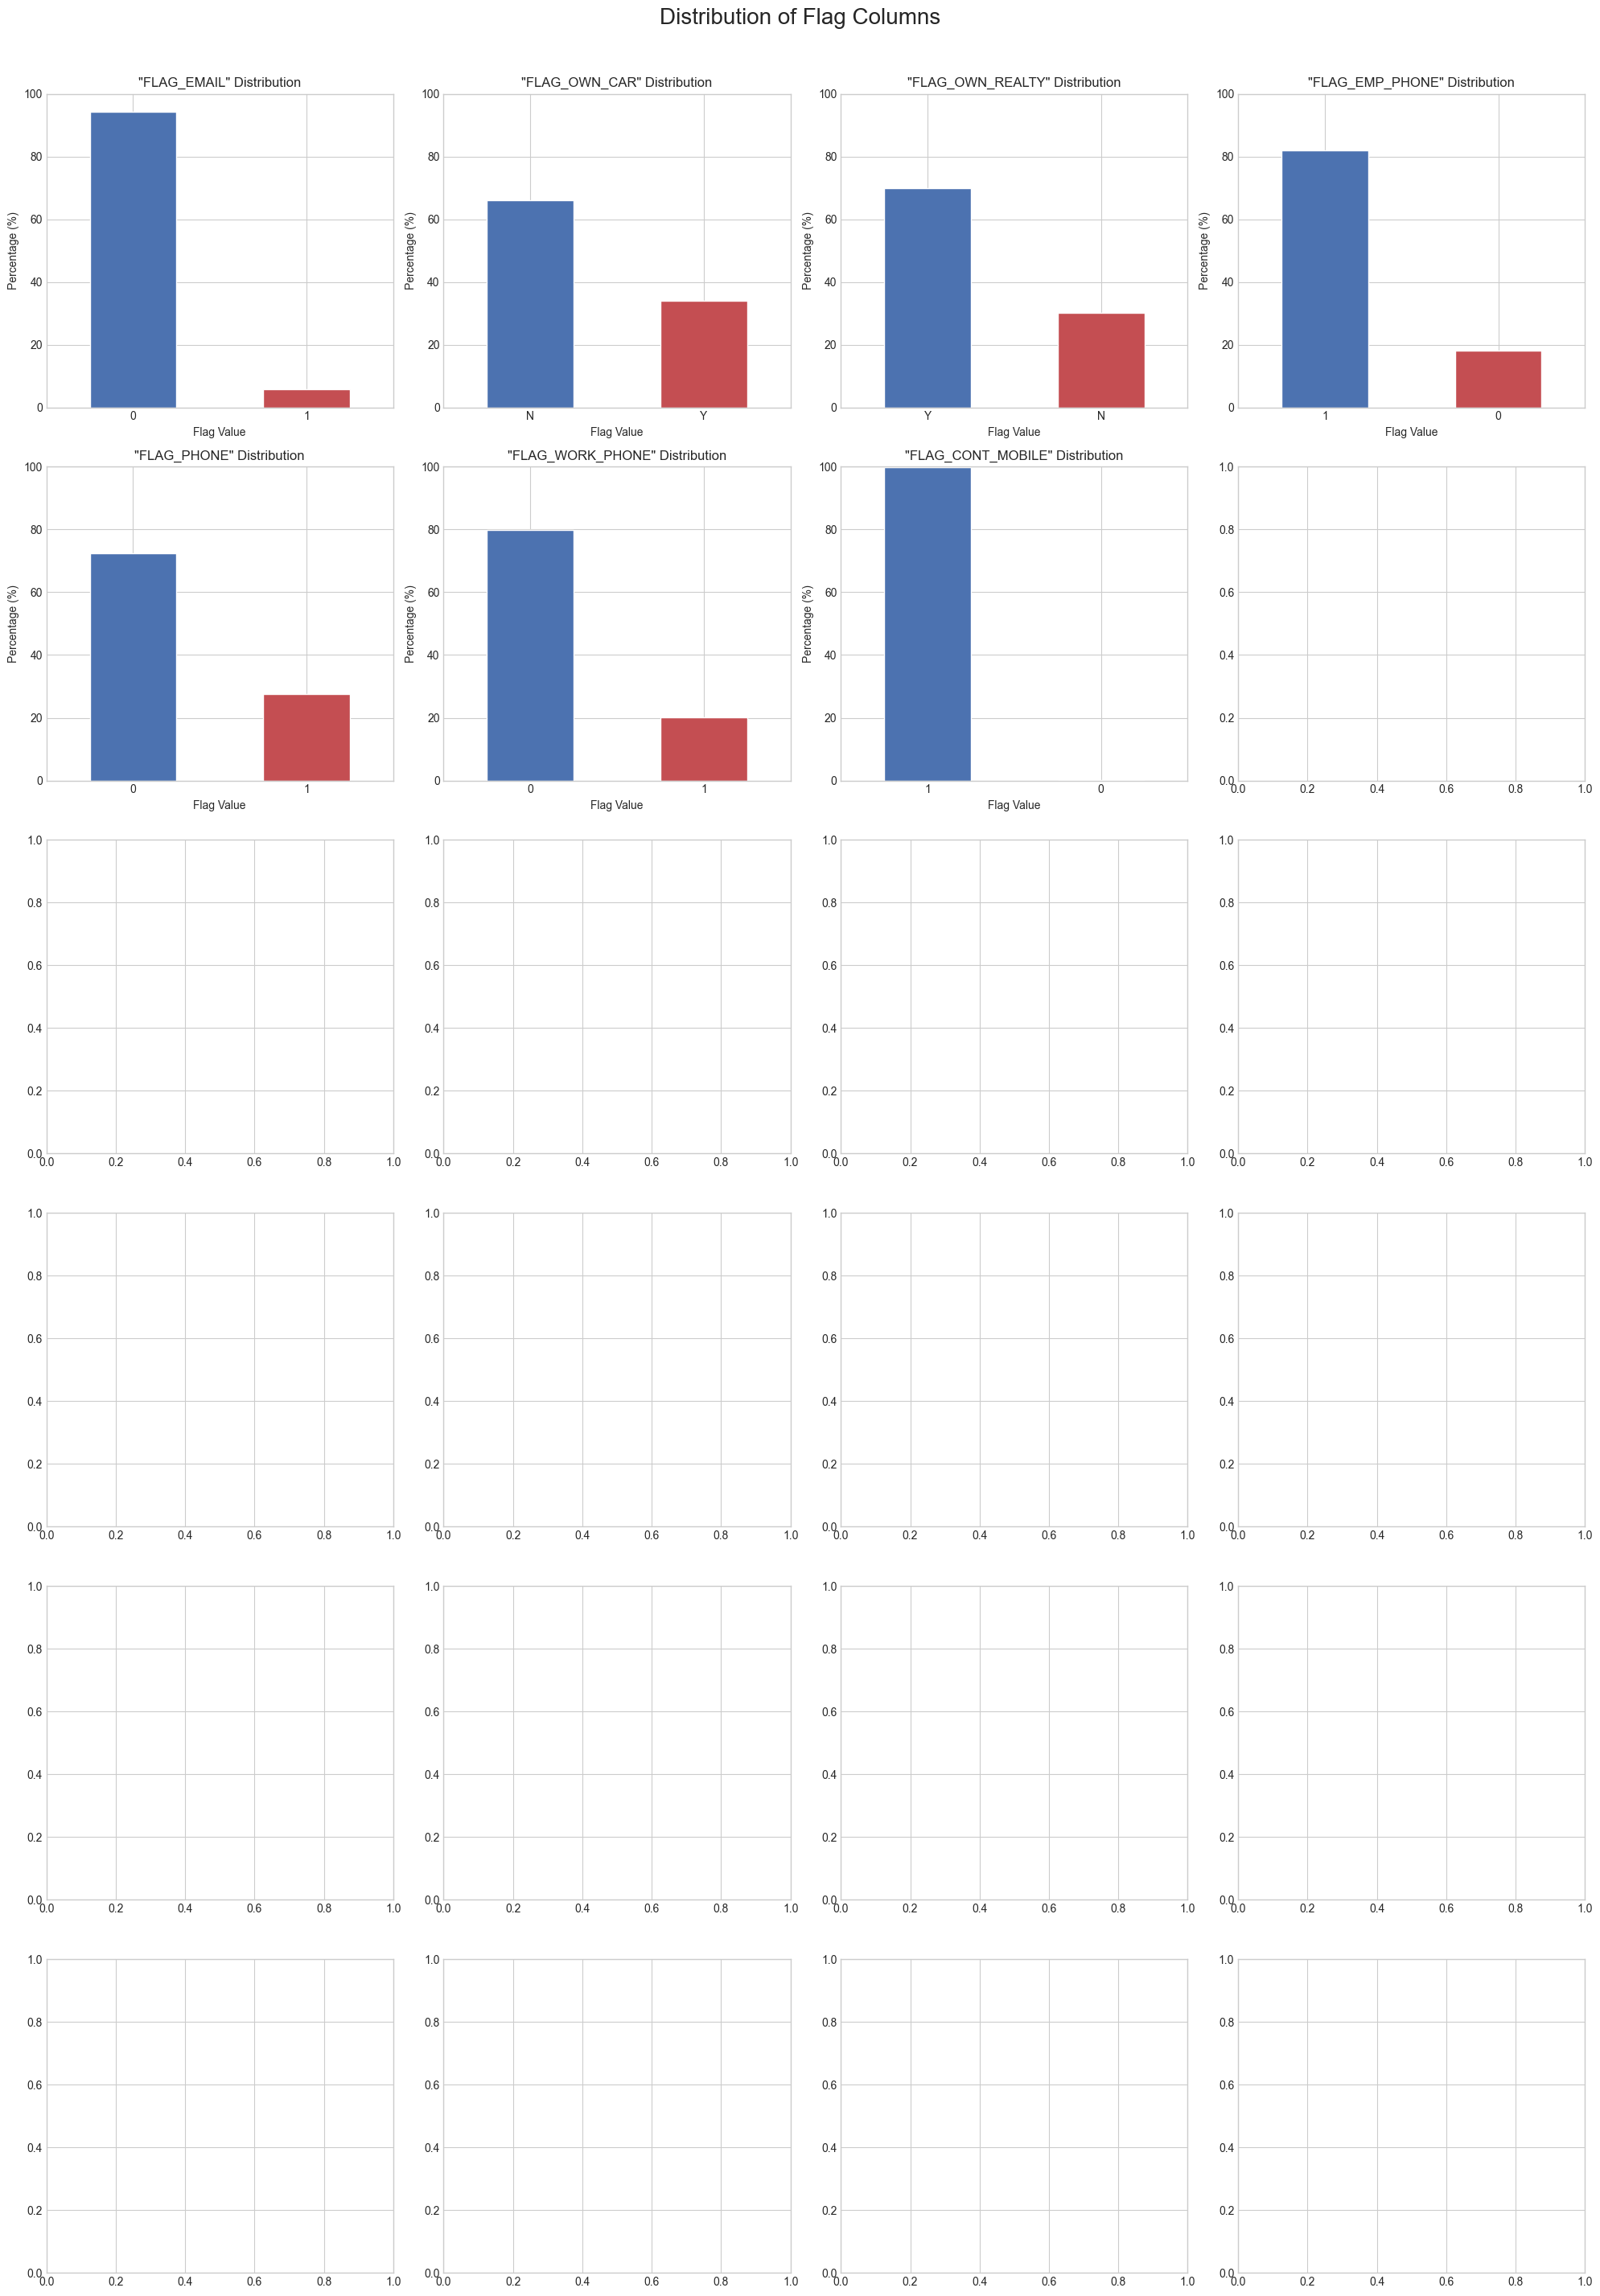

In [50]:
# Checking distribution of the flag columns
columns_to_check = [
    'FLAG_EMAIL',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'FLAG_EMP_PHONE',
    'FLAG_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21'
]

print("--- Analyzing Column Distributions ---\n")

# --- Plotting Setup ---
# Arrange plots in a grid to keep them readable
n_cols = 4
# Calculate the number of rows needed to fit all plots
n_rows = (len(columns_to_check) + n_cols - 1) // n_cols

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle('Distribution of Flag Columns', fontsize=20)

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

for i, col_name in enumerate(columns_to_check):
    # Skip if column is not in the dataframe
    if col_name not in df.columns:
        print(f"--- Warning: Column '{col_name}' not found in DataFrame. Skipping. ---\n")
        continue

    # Calculate the percentage distribution
    distribution = df[col_name].value_counts(normalize=True) * 100

    print(f"--- {col_name} ---")
    print(distribution)
    print("\n")

    # Create the bar plot on the correct subplot
    ax = axes[i]
    distribution.plot(kind='bar', ax=ax, color=['#4C72B0', '#C44E52'])

    ax.set_title(f'"{col_name}" Distribution')
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Flag Value')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_ylim(0, 100) # Set y-axis to be from 0 to 100%

# Hide any unused subplots if the number of plots is not a perfect multiple of n_cols
for j in range(len(columns_to_check), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout to make room for suptitle
plt.show()

In [51]:
#dropping the flag_documents column
flagdocs = [col for col in df.columns if 'FLAG_DOCUMENT' in col]
df=df.drop(flagdocs, axis=1)
df.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE,REGISTRATION_YEARS,ID_PUBLISH_YEARS,DAYS_EMPLOYED_ANOMALY
0,0,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,0.0,0.0,0.0,0.0,1.0,0.668497,38,1,13,False
1,1,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0.0,0.0,0.0,0.0,1.0,0.512601,23,9,3,False
2,2,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,...,0.0,0.0,0.0,1.0,0.0,0.149240,35,17,10,False
3,3,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,...,0.0,0.0,0.0,0.0,0.0,0.556444,52,6,7,False
4,4,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,...,0.0,0.0,0.0,2.0,5.0,0.581288,30,21,7,False


In [52]:
#drop the organization type column
df=df.drop(['ORGANIZATION_TYPE'], axis=1)

In [55]:
#output_filename = 'cleaned_casedata.csv'
#df.to_csv(output_filename, index=False)

In [60]:
df = df.drop(['Unnamed: 0', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)
df.head()


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE,REGISTRATION_YEARS,ID_PUBLISH_YEARS,DAYS_EMPLOYED_ANOMALY
0,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,...,0.0,0.0,0.0,0.0,1.0,0.668497,38,1,13,False
1,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,247500.0,...,0.0,0.0,0.0,0.0,1.0,0.512601,23,9,3,False
2,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,...,0.0,0.0,0.0,1.0,0.0,0.149240,35,17,10,False
3,0,Cash loans,F,N,Y,0,90000.0,225000.0,11074.5,225000.0,...,0.0,0.0,0.0,0.0,0.0,0.556444,52,6,7,False
4,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,360000.0,...,0.0,0.0,0.0,2.0,5.0,0.581288,30,21,7,False
